## Hough Transform
- Hough transform is a feature extraction method for detecting simple shapes such as circles, lines etc in an image.

- A “simple” shape is one that can be represented by only a few parameters. For example, a line can be represented by two parameters (slope, intercept) and a circle has three parameters — the coordinates of the center and the radius (x, y, r). Hough transform does an excellent job in finding such shapes in an image.

- The main advantage of using the Hough transform is that it is insensitive to occlusion. 

### Hough transform to detect lines in an image 
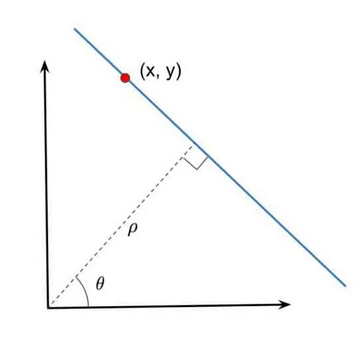

### Equation of a line in polar coordinates

From high school math class we know the polar form of a line is represented as:

$$    \begin{align*} \rho = x\cos(\theta) + y\sin (\theta) \end{align*} $$


Here $\rho$ represents the perpendicular distance of the line from the origin in pixels, and $\theta$ is the angle measured in radians, which the line makes with the origin as shown in the figure above.

You may be tempted to ask why we did not use the familiar equation of the line given below

    y = mx + c

The reason is that the slope, m, can take values between – $\infty$ to +$\infty$. For the Hough transform, the parameters need to be bounded.

You may also have a follow-up question. In the $(\rho, \theta)$ form, $\theta$ is bounded, but can’t $\rho$ take a value between 0 to $+\infty$ ? That may be true in theory, but in practice, $\rho$ is also bounded because the image itself is finite.

### Accumulator

When we say that a line in 2D space is parameterized by $\rho$ and $\theta$, it means that if we any pick a $(\rho, \theta)$, it corresponds to a line.

Imagine a 2D array where the x-axis has all possible $\theta$ values and the y-axis has all possible $\rho$ values. Any bin in this 2D array corresponds to one line. 

This 2D array is called an accumulator because we will use the bins of this array to collect evidence about which lines exist in the image. The top left cell corresponds to a $(-R, 0)$ and the bottom right corresponds to $(R, \pi)$.



## HoughLine: How to Detect Lines using OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Trackbar callback function to update the threshold and display edges and lines
def onTrackbarChange(max_slider):
    global img, dst, gray

    # Copy of the original image to draw lines on
    dst = np.copy(img)

    # Threshold values for Canny edge detection
    th1 = max_slider
    th2 = int(th1 * 0.4)
    
    # Perform Canny edge detection
    edges = cv2.Canny(gray, th1, th2)

    # Apply Probabilistic Hough Line Transform
    lines = cv2.HoughLinesP(edges, 2, np.pi / 180, threshold=50, minLineLength=10, maxLineGap=100)

    # Draw lines on detected edges
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(dst, (x1, y1), (x2, y2), (0, 0, 255), 1)

    # Display the results
    cv2.imshow("Result Image", dst)
    cv2.imshow("Edges", edges)

In [3]:
# Read and resize the image
img = cv2.imread('./images/road.jpg')

# Set width and height scaling percentages
width_scale_percent = 50   # Width scale percentage
height_scale_percent = 30  # Height scale percentage to make height smaller

# Calculate new dimensions based on independent scaling percentages
width = int(img.shape[1] * width_scale_percent / 100)
height = int(img.shape[0] * height_scale_percent / 100)
img = cv2.resize(img, (width, height))

# Create a grayscale version of the image for edge detection
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create display windows
cv2.namedWindow("Edges")
cv2.namedWindow("Result Image")

# Initialize threshold values for the trackbar
initThresh = 500
maxThresh = 1000

# Create a trackbar and initialize the display
cv2.createTrackbar("threshold", "Result Image", initThresh, maxThresh, onTrackbarChange)
onTrackbarChange(initThresh)

# Run loop to display results and wait for 'Esc' key to exit
while True:
    key = cv2.waitKey(1)
    if key == 27:  # 'Esc' key to break the loop
        break

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread

## HoughCircles : Detect circles in an image with OpenCV
In the case of line Hough transform, we required two parameters, $(\theta, \rho)$ but to detect circles, we require three parameters 

- (x, y) coordinates of the center of the circle. 
- radius. 

As you can imagine, a circle detector will require a 3D accumulator — one for each parameter.

The equation of a circle is given by

$$\begin{align*} (x - x_0)^2 + (y - y_0)^2 = r^2 \end{align*}$$

The following steps are followed to detect circles in an image: –
- Find the edges in the given image with the help of edge detectors (Canny).
- For detecting circles in an image, we set a threshold for the maximum and minimum value of the radius.
- Evidence is collected in a 3D accumulator array for the presence of circles with different centers and radii. 

In [4]:
def onTrackbarChange(max_slider):
    cimg = np.copy(img)

    p1 = max_slider
    p2 = max_slider * 0.4

    # Detect circles using HoughCircles transform
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, cimg.shape[0]/64, param1=p1, param2=p2, minRadius=25, maxRadius=50)

    # If at least 1 circle is detected
    if circles is not None:
        cir_len = circles.shape[1] # store length of circles found
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            # Draw the outer circle
            cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
            # Draw the center of the circle
            cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
    else:
        cir_len = 0 # no circles detected
    
    # Display output image
    cv2.imshow('Image', cimg)    

    # Edge image for debugging
    edges = cv2.Canny(gray, p1, p2)
    cv2.imshow('Edges', edges)

In [5]:
# Read image
img = cv2.imread("./images/coins.png")

# Set width and height scaling percentages
width_scale_percent = 50   # Width scale percentage
height_scale_percent = 30  # Height scale percentage to make height smaller

# Calculate new dimensions based on independent scaling percentages
width = int(img.shape[1] * width_scale_percent / 100)
height = int(img.shape[0] * height_scale_percent / 100)
img = cv2.resize(img, (width, height))


# Convert to gray-scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create display windows
cv2.namedWindow("Edges")
cv2.namedWindow("Image")


# Trackbar will be used for changing threshold for edge 
initThresh = 105 
maxThresh = 200 

# Create trackbar
cv2.createTrackbar("Threshold", "Image", initThresh, maxThresh, onTrackbarChange)
onTrackbarChange(initThresh)

while True:
    key = cv2.waitKey(1)
    if key == 27:
        break

cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread (0x2a83e00).
Cannot move to target thread (0x235f310)

QObject::moveToThread: Current thread (0x235f310) is not the object's thread